In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Switch to y-1000.csv for a smaller dataset
DF_NAME = 'y-100000.csv'

In [4]:
# Import DataFrame from CSV
df = pd.read_csv(DF_NAME)

# Set the column names
df = df.set_axis(['s', 'text'], axis=1)

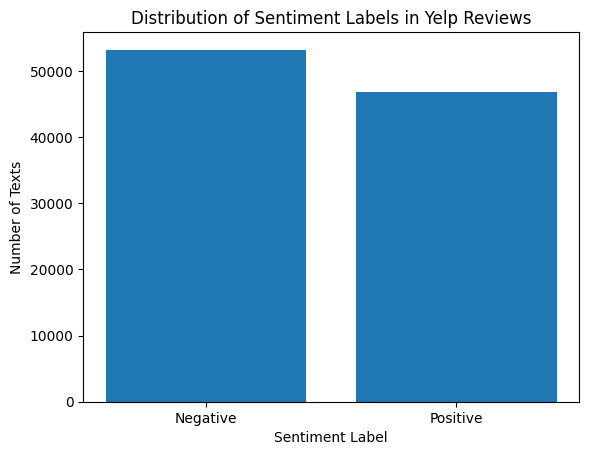

In [5]:
# Get the counts of each sentiment label
sentiment_counts = df['s'].value_counts()

# Create a bar chart with custom x-axis labels
plt.bar(['Negative', 'Positive'], sentiment_counts.values,
        tick_label=['Negative', 'Positive'])

# Add axis labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Texts')
plt.title('Distribution of Sentiment Labels in Yelp Reviews')

# Display the chart
plt.show()

The dataset consists of a collection of text data along with their corresponding sentiment labels. The first column represents the sentiment labels, where 1 indicates a negative sentiment and 2 indicates a positive sentiment. The second column contains the Yelp reviews in the form of strings. 

In [6]:
# Split the test data
X = df['text']
y = df['s']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, train_size=0.9, random_state=1234)

In [7]:
# Perform Multinoial Naive Bayes
print('Performaing Multinomial Naive Bayes...')
mnb_pipe = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('mnb', MultinomialNB())
                     ])
mnb = mnb_pipe.fit(X_train, y_train)
print("\tMultinomial Naive Bayes Accuracy:", accuracy_score(mnb.predict(X_test), y_test))

Performaing Multinomial Naive Bayes...
	Multinomial Naive Bayes Accuracy: 0.8712


In [8]:
# Perform Logistic Regression
print('Performaing Logistic Regression...')
lgr_pipe = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                     ])
lgr = lgr_pipe.fit(X_train, y_train)
print("\tLogistic Regression Accuracy:", accuracy_score(lgr.predict(X_test), y_test))

Performaing Logistic Regression...


/home/mikey/code/nlp-class-cs4395/src/hw7/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


	Logistic Regression Accuracy: 0.9124


In [9]:
# Perform MLP Classifier
print('Performaing MLP Classifier...')
mlp_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('neuralnet', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                hidden_layer_sizes=(15, 7), random_state=1)),
])
mlp = mlp_pipe.fit(X_train, y_train)
print("\tMLP Classifier Accuracy:", accuracy_score(mlp.predict(X_test), y_test))

Performaing MLP Classifier...


/home/mikey/code/nlp-class-cs4395/src/hw7/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


	MLP Classifier Accuracy: 0.9179


# Naïve Bayes

Naïve Bayes is a simple and effective algorithm for text classification. It is based on Bayes' theorem, which describes the probability of an event based on prior knowledge. Naïve Bayes assumes that the features are independent of each other, which is not always true in the case of text classification. Despite this limitation, Naïve Bayes can still perform well in certain situations, especially when the dataset is small. In general, Naïve Bayes is faster and requires less training data than other algorithms.

# Logistic Regression

Logistic Regression is a statistical algorithm used for binary classification. It models the probability of a binary outcome based on one or more independent variables. In text classification, each word in the document is treated as an independent variable. Logistic Regression is a good choice when the number of features is small, and the dataset is large. It is also easy to interpret the results of Logistic Regression.

# Neural Networks

The MLP Classifier is a powerful NN algorithm for text classification. It is composed of multiple layers of interconnected nodes, which can capture complex patterns in the data. Neural Networks require a large amount of training data and computing power. However, they can achieve high accuracy if they are trained properly. In addition, Neural Networks can handle large datasets with a large number of features.

# Performance Evaluation
Naïve Bayes is the fastest, followed by Logistic Regression then Neural Networks. Although Logistics Regression and Neural Networks both performed significantly better than Naïve Bayes, it definitely suffered when I added a larger dataset. Logistic Regression is great for this case because it runs in a short amount of time and is able to generate a high accuracy result due to only having 2 text classes. The benefit of using the neural network was minimal compared to the almost 5x of runtime that it took.